# Protein repeat design
In this document we test additional features of the RepeatDesigner package beyond running an optimization of the protein sequence. Here we explore the presence of repeats, how these are encoded in the package, and how we give weights inside a composite scoring function.

First we load a number of libraries and then the ```repeatdesigner``` package.

In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from repeatdesigner import designer as rd

#### Competing interfaces
One of the functionalities encoded in the package is the divergence of protein repeat interfaces by gradually introducing mutations in different target regions. This allows for recovering specificity in the binding between repeats, since negative design is introduced between interfaces.

We start by constructing our ```Repeat``` object. For this we need a PDB file, a description of the repeats (which will be double-checked internally) and the target residues for design.

In [3]:
targets = [2,36,70]
repeats = [(2,34), \
           (36,68), \
          (70,102)]
tpr_des = rd.Repeat(pdb="pdbs/3atb.pdb", targets=targets, repeats=repeats)

 Generated new protein design 
 .. name : pdbs/3atb
 .. file : pdbs/3atb.pdb
 .. sequence : NSAEAWYNLGNAYYKQGDYDEAIEYYQKALELDPNNAEAWYNLGNAYYKQGDYDEAIEYYQKALELDPNNAEAWYNLGNAYYKQGDYDEAIEYYQKALELDPNNAEAKQDLGNAKQKQG
 .. target residues :  [2, 36, 70]
 .. repeats :  [(2, 34), (36, 68), (70, 102)]


Next we define our ```Optimizer``` object, which will run the Monte Carlo sampling for us. We define parameters corresponding to the thermal energy (```beta```), the length of the search (```len_mc```) and the number of parallel runs (```nruns```).

In [4]:
mc_tpr = rd.Optimizer(tpr_des, beta=1e-4, len_mc=10, nruns=1)
mc_tpr.run_mc()

 Run #0
 I am a repeat protein!
NSAEAWYNLGNAYYKQGDYDEAIEYYQKALELDPNNAEAWYNLGNAYYKQGDYDEAIEYYQKALELDPNNAEAWYNLGNAYYKQGDYDEAIEYYQKALELDPNNAEAKQDLGNAKQKQG
2 GLN
NSQEAWYNLGNAYYKQGDYDEAIEYYQKALELDPNNAEAWYNLGNAYYKQGDYDEAIEYYQKALELDPNNAEAWYNLGNAYYKQGDYDEAIEYYQKALELDPNNAEAKQDLGNAKQKQG
0 atoms in HETATM/BLK residues constrained
to protein atoms within 2.30 angstroms
and protein CA atoms within 10.00 angstroms
0 atoms in residues without defined topology
constrained to be rigid bodies

>> Summary of successfully produced models:
Filename                          molpdf
----------------------------------------
/var/folders/40/_89m_cn117z124qbymrrklk00000gq/T/mut_fnquWp.fasta.B99990001.pdb      503.44254

<open file '<fdopen>', mode 'w+b' at 0x116fb9f60>
 Initial repeat:
[Seq('AEAWYNLGNAYYKQGDYDEAIEYYQKALELDPN', Alphabet()), Seq('AEAWYNLGNAYYKQGDYDEAIEYYQKALELDPN', Alphabet()), Seq('AEAWYNLGNAYYKQGDYDEAIEYYQKALELDPN', Alphabet())]
Finding mutated residue in repeat
 Mutated repeat: 0 (2, 34)
[Mutab

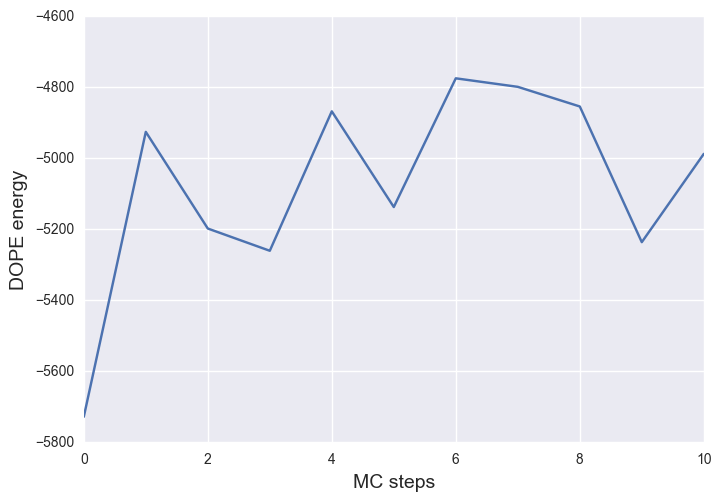

In [5]:
fig, ax = plt.subplots()
for k,v in mc_tpr.models.iteritems():
    ax.plot(v['score'])

ax.set_ylabel('DOPE energy', fontsize=14)
ax.set_xlabel('MC steps', fontsize=14)